<b>Mushroom Data Set</b> 
(reference to UCI Machine Learning Repository <a href="https://archive.ics.uci.edu/ml/datasets/mushroom">description</a>)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

from IPython.display import display

import numpy as np
np.set_printoptions(precision=4, threshold=10000, linewidth=100, edgeitems=999, suppress=True)

import pandas as pd
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 200)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('precision', 6)

import warnings
warnings.simplefilter("ignore")

import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder

from lib.outlierdetection import *

%load_ext watermark
%watermark -a "tb" -d -v -m -p sys,numpy,pandas,sklearn,torch,IPython

tb 2018-09-13 

CPython 3.6.4
IPython 6.2.1

sys 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy 1.14.2
pandas 0.22.0
sklearn 0.19.2
torch 0.4.0a0+9692519
IPython 6.2.1

compiler   : GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.5.0
machine    : x86_64
processor  : i386
CPU cores  : 24
interpreter: 64bit


In [2]:
# Seed random generators for repro 
SEED = 2017
np.random.seed(SEED)  

In [3]:
dataframe = pd.read_csv("data/agaricus-lepiota.csv", header=None)

# Read Header file
feature_names= []
with open('data/agaricus-lepiota.txt', 'r') as f_names:
    for line in f_names:
        feature_names.append(line.strip())
dataframe.columns = ['class'] + feature_names
target_names = ['edible', 'poisonous']

feature_names, target_names

(['cap-shape',
  'cap-surface',
  'cap-color',
  'bruises',
  'odor',
  'gill-attachment',
  'gill-spacing',
  'gill-size',
  'gill-color',
  'stalk-shape',
  'stalk-root',
  'stalk-surface-above-ring',
  'stalk-surface-below-ring',
  'stalk-color-above-ring',
  'stalk-color-below-ring',
  'veil-type',
  'veil-color',
  'ring-number',
  'ring-type',
  'spore-print-color',
  'population',
  'habitat'],
 ['edible', 'poisonous'])

In [4]:
#Transform data form categorial to numeric
cat_variables = [i for i in dataframe.columns if dataframe[i].dtype == 'object']
encods = [LabelEncoder() for col in cat_variables]
for i, col in enumerate(cat_variables):
    dataframe[col] = encods[i].fit_transform(dataframe[col].astype(str))

In [5]:
# Check for NaNs and if scaling is required - look for categorial data that need transformation
display(dataframe.head())
display(dataframe.describe())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


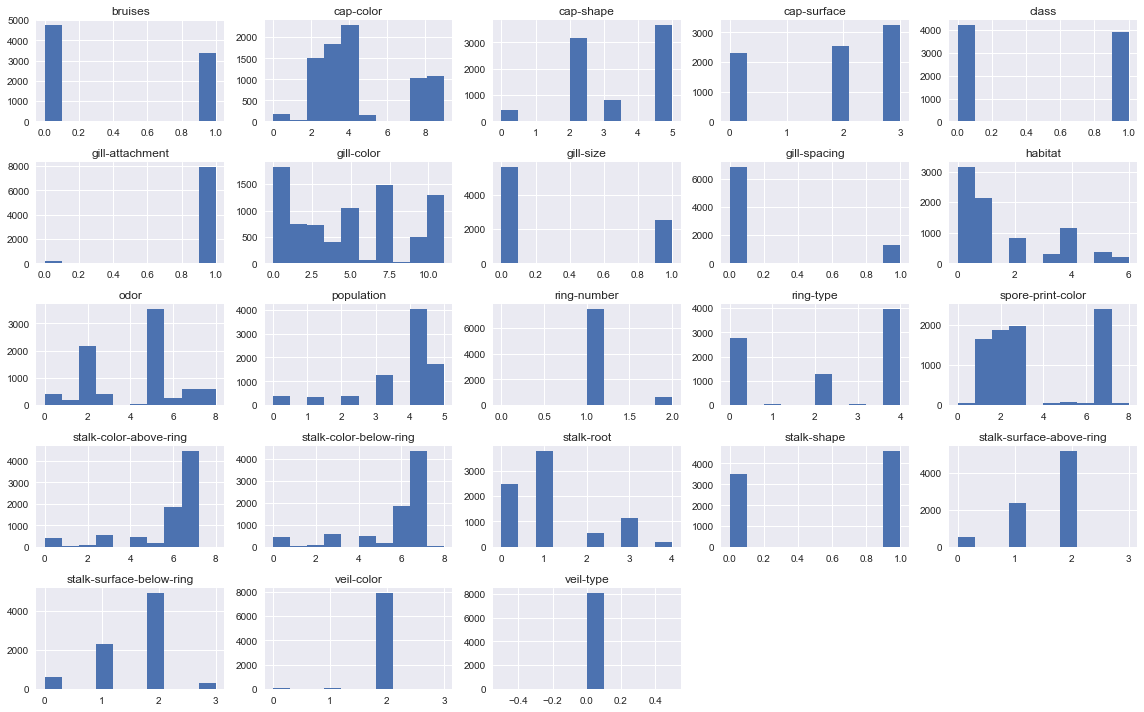

In [6]:
# check features and their individual distribution - watch for outliers
dataframe.hist(figsize=(16,10));
plt.tight_layout()

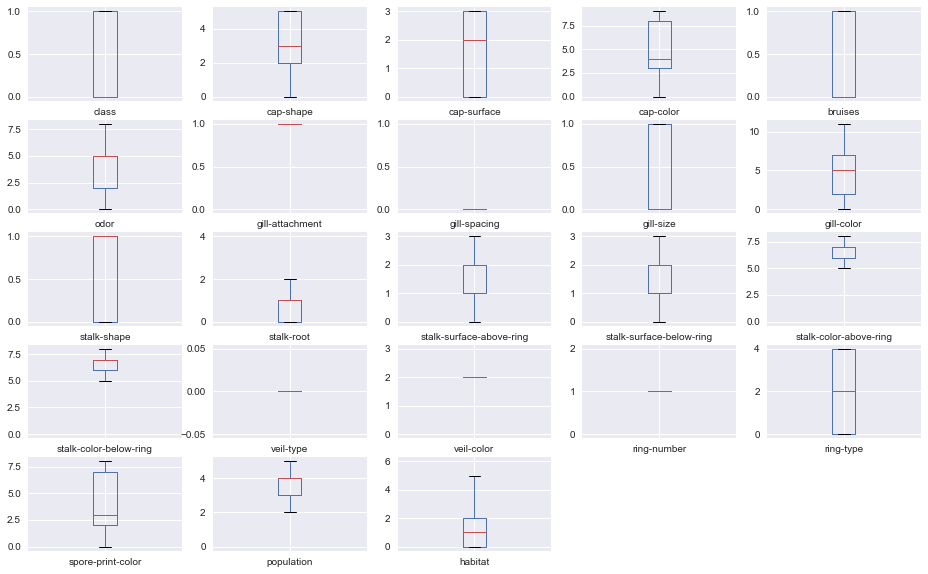

In [7]:
dataframe.plot(kind= 'box' , subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(16,10));

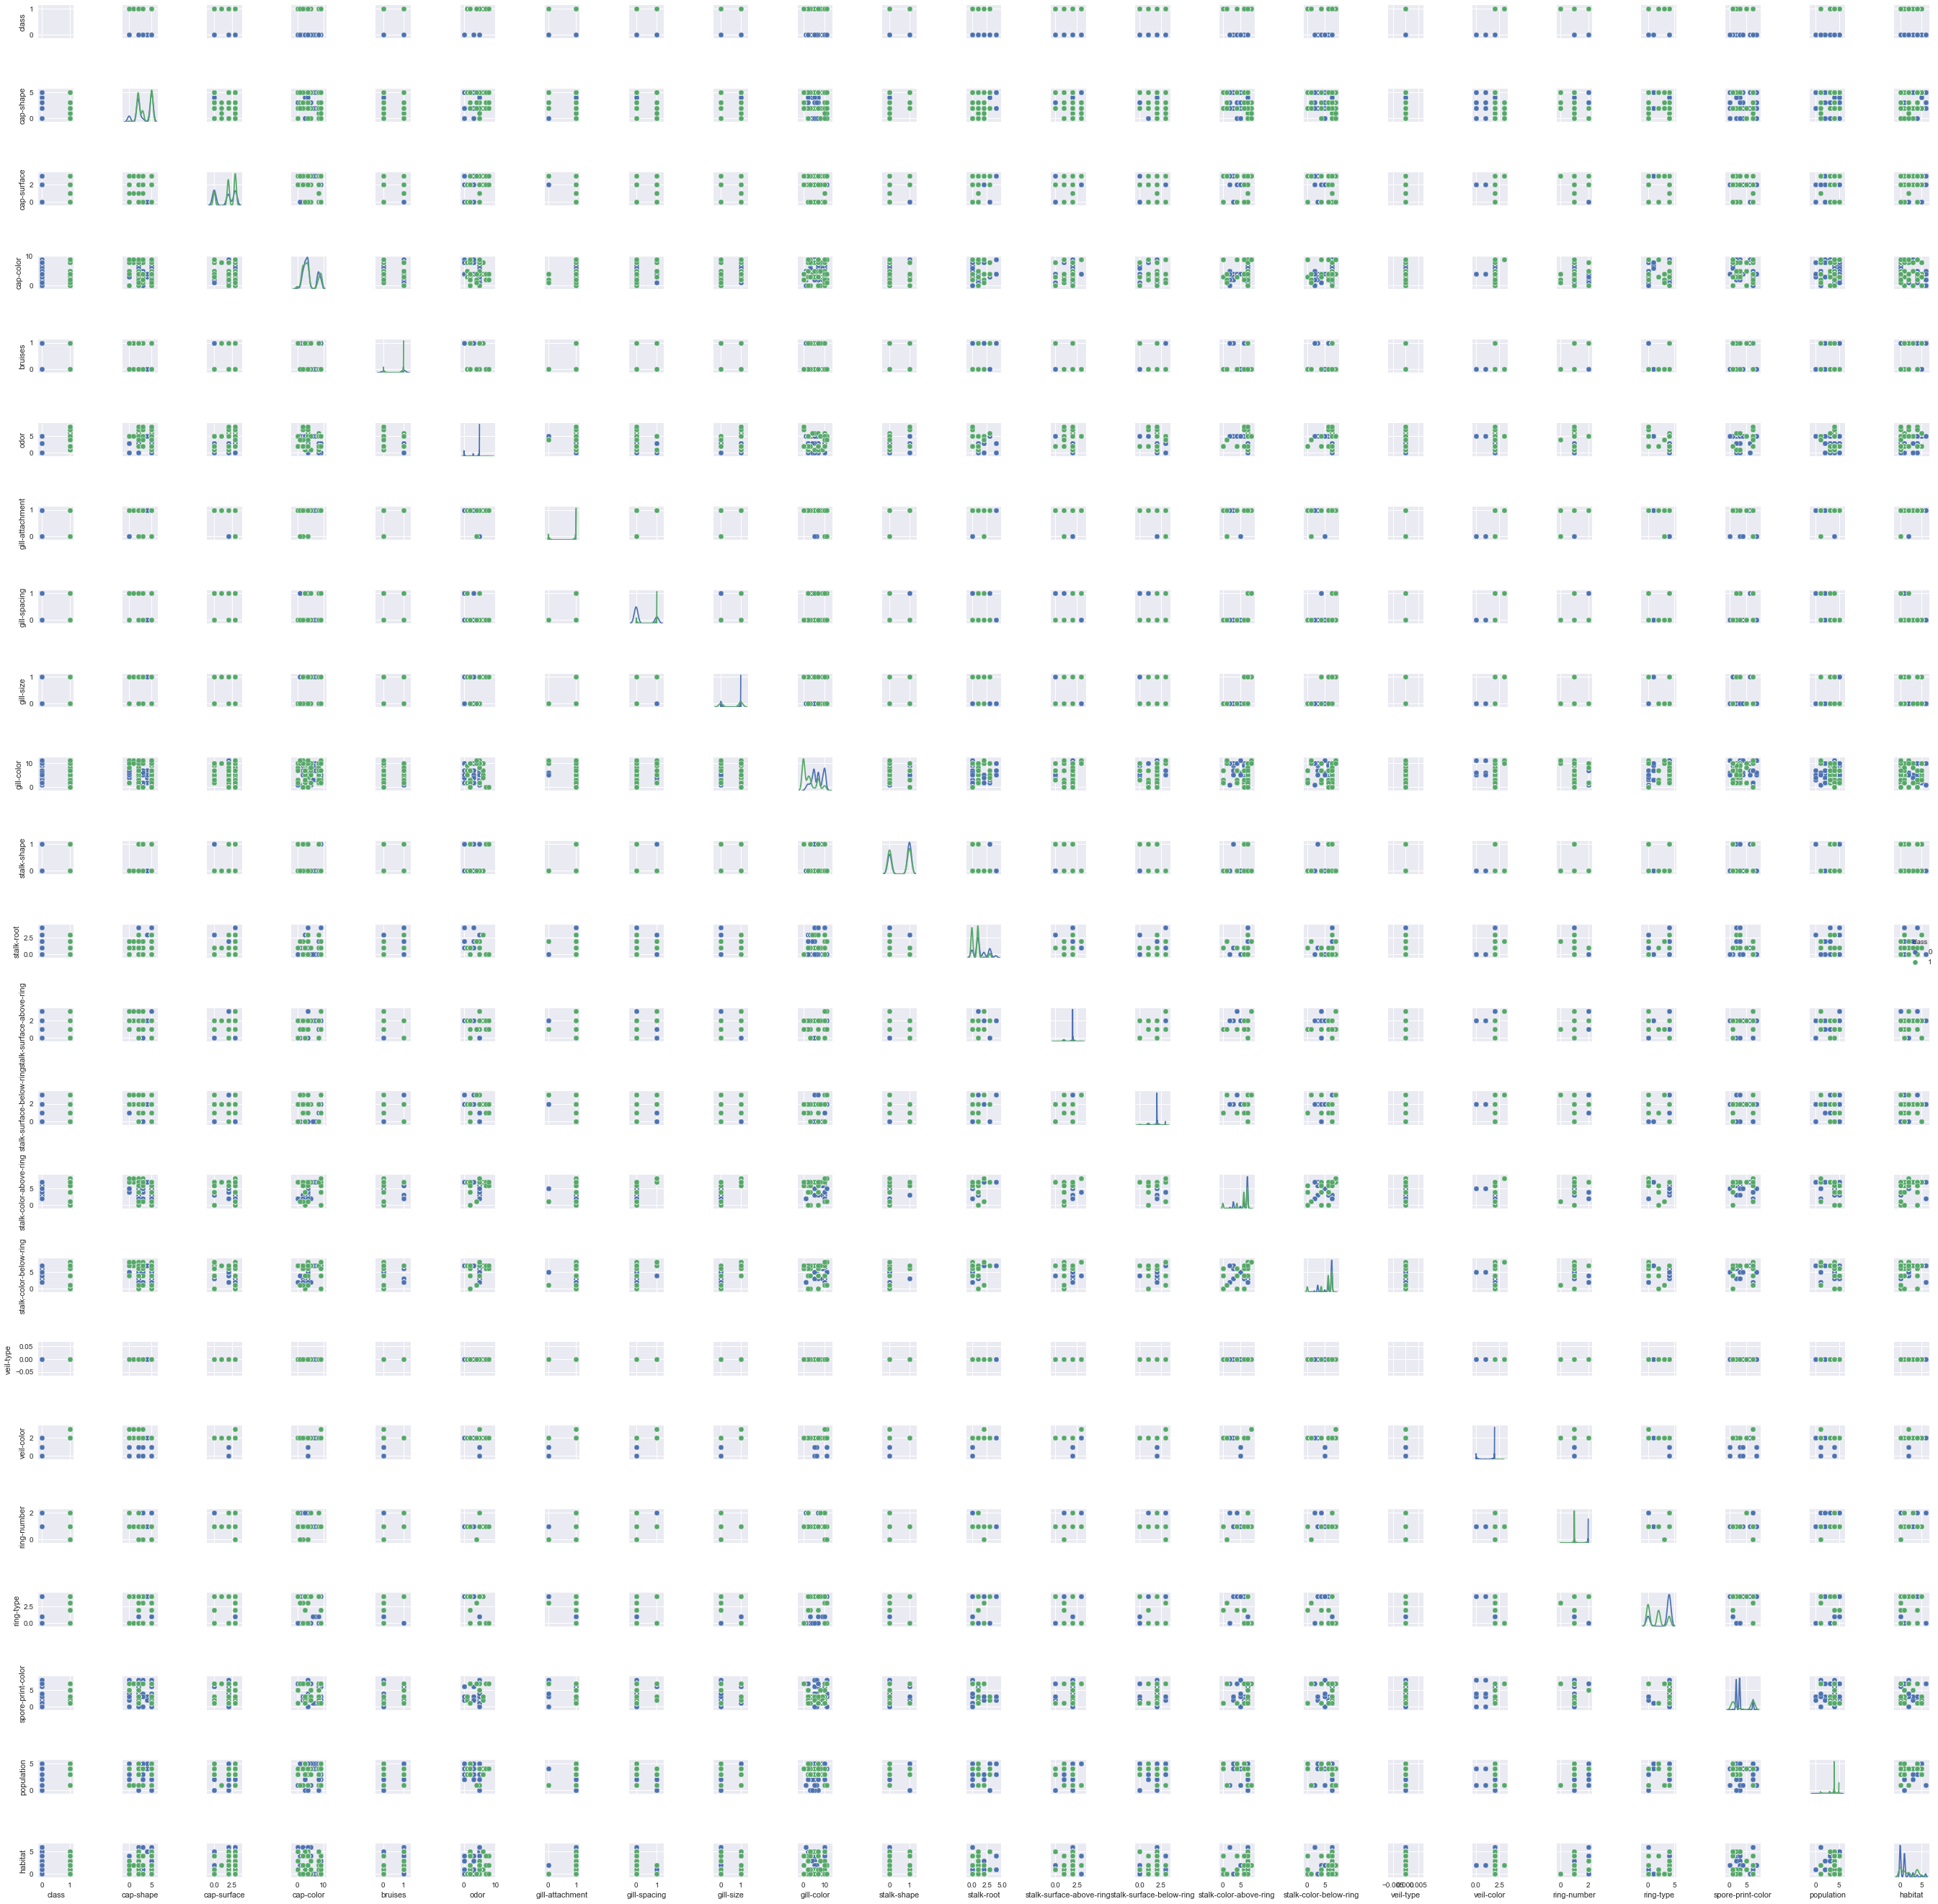

In [8]:
# Produce a scatter matrix for each pair of features in the data
# Note the result below is an image - you can zoom in to see details
mx_plot = sns.pairplot(dataframe, hue='class', diag_kind="kde", size=1.6)
plt.tight_layout()

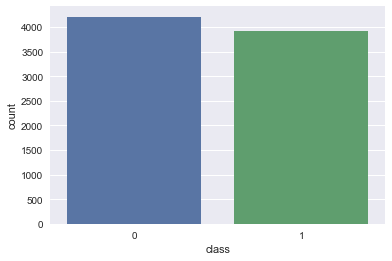

In [9]:
# check class distribution and if calsses are balanced
sns.countplot(dataframe["class"])

In [10]:
# Check for null values 
for column in feature_names:
    print("%s %d" % (str(column).ljust(25), np.sum((dataframe[column] == 0.0))))

cap-shape                 452
cap-surface               2320
cap-color                 168
bruises                   4748
odor                      400
gill-attachment           210
gill-spacing              6812
gill-size                 5612
gill-color                1728
stalk-shape               3516
stalk-root                2480
stalk-surface-above-ring  552
stalk-surface-below-ring  600
stalk-color-above-ring    432
stalk-color-below-ring    432
veil-type                 8124
veil-color                96
ring-number               36
ring-type                 2776
spore-print-color         48
population                384
habitat                   3148


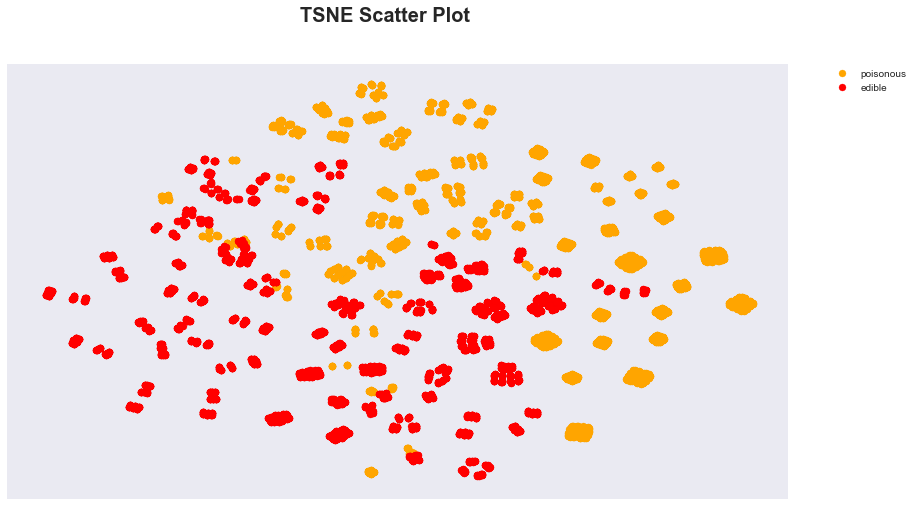

In [11]:
#TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca', random_state=0)
tsne_data_raw = tsne.fit_transform(np.float32(dataframe.values[:,1:]))
labels_raw = np.int32(dataframe.values[:,0])

#set up figure
fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(tsne_data_raw[np.where(labels_raw==1),0],tsne_data_raw[np.where(labels_raw==1),1], c='orange', label=target_names[1])
ax.scatter(tsne_data_raw[np.where(labels_raw==0),0],tsne_data_raw[np.where(labels_raw==0),1], c='red', label=target_names[0])

ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

fig.suptitle('TSNE Scatter Plot', fontsize=20, fontweight='bold')
plt.legend(loc=2, borderaxespad=.1, scatterpoints=1,bbox_to_anchor=(1.05, 1))